In [1]:
 import tensorflow as tf
import cv2
import numpy as np
import pandas as pd

print("TensorFlow Version:", tf.__version__)
print("OpenCV Version:", cv2.__version__)
print("Setup Successful!")


TensorFlow Version: 2.18.0
OpenCV Version: 4.11.0
Setup Successful!


In [5]:
import os

dataset_path = dataset_path = r"C:\Users\disha\OneDrive\Desktop\FoodCalorieEstimation\food images\food-101\food-101\images"
# List first 10 food categories
food_classes = os.listdir(dataset_path)[:10]
print("Food Categories:", food_classes)


Food Categories: ['.DS_Store', 'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding']


In [7]:
for category in food_classes:
    category_path = os.path.join(dataset_path, category)
    
    # Check if it's a directory (ignore files like .DS_Store)
    if os.path.isdir(category_path):
        num_images = len(os.listdir(category_path))
        print(f"{category}: {num_images} images")


apple_pie: 1000 images
baby_back_ribs: 1000 images
baklava: 1000 images
beef_carpaccio: 1000 images
beef_tartare: 1000 images
beet_salad: 1000 images
beignets: 1000 images
bibimbap: 1000 images
bread_pudding: 1000 images


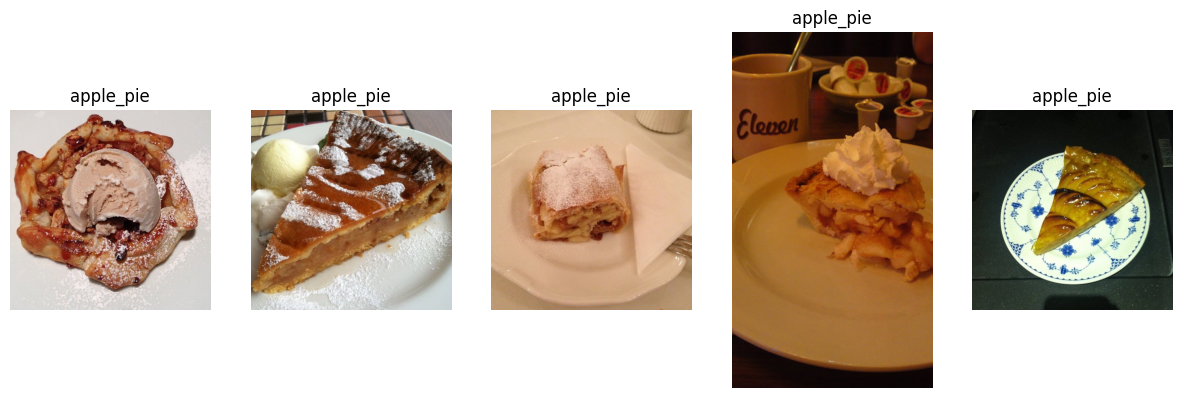

In [8]:
import matplotlib.pyplot as plt
import cv2
import random

# Select a random food category
random_category = random.choice(food_classes)
category_path = os.path.join(dataset_path, random_category)

# Get a list of image files in that category
image_files = os.listdir(category_path)

# Select a few random images
sample_images = random.sample(image_files, 5)

# Plot the images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(category_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(random_category)

plt.show()


In [10]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define image size
IMG_SIZE = (224, 224)  # Standard size for deep learning models

# Function to preprocess a single image
def preprocess_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)  # Resize
    img = img_to_array(img) / 255.0  # Convert to array & normalize
    return img

# Find a valid image path (ignore non-folders)
valid_classes = [c for c in food_classes if os.path.isdir(os.path.join(dataset_path, c))]
test_img_path = os.path.join(dataset_path, valid_classes[0], os.listdir(os.path.join(dataset_path, valid_classes[0]))[0])

# Preprocess and check the shape
processed_img = preprocess_image(test_img_path)
print("Processed Image Shape:", processed_img.shape)


Processed Image Shape: (224, 224, 3)


In [11]:
from sklearn.model_selection import train_test_split

# Prepare lists to store data
X = []  # Images
y = []  # Labels

# Assign numeric labels to each food class
label_map = {food: idx for idx, food in enumerate(valid_classes)}

# Load images from all categories
for category in valid_classes:
    category_path = os.path.join(dataset_path, category)
    for img_file in os.listdir(category_path)[:500]:  # Limiting to 500 per class for speed
        img_path = os.path.join(category_path, img_file)
        img_array = preprocess_image(img_path)
        X.append(img_array)
        y.append(label_map[category])

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)


Training Data Shape: (3600, 224, 224, 3) (3600,)
Testing Data Shape: (900, 224, 224, 3) (900,)


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(valid_classes), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


C:\Users\disha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.1556 - loss: 2.4724 - val_accuracy: 0.2333 - val_loss: 2.0443
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 130s 924ms/step - accuracy: 0.2959 - loss: 1.9197 - val_accuracy: 0.3833 - val_loss: 1.7286
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 101s 897ms/step - accuracy: 0.3875 - loss: 1.7345 - val_accuracy: 0.4556 - val_loss: 1.6031
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.4504 - loss: 1.5720 - val_accuracy: 0.4589 - val_loss: 1.5805
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.5053 - loss: 1.3919 - val_accuracy: 0.4689 - val_loss: 1.5334
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 101s 898ms/step - accuracy: 0.5828 - loss: 1.1683 - val_accuracy: 0.4756 - val_loss: 1.5869
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 104s 923ms/step - accuracy: 0.6544 - loss: 0.9680 - val_accuracy: 0.4589 - val_loss: 1.6416
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 99s 877ms/step - accuracy: 0.7091 - loss: 0.8

In [14]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.4634 - loss: 2.0359
Test Accuracy: 0.44
Test Loss: 2.17


In [17]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Get the valid food category directories (skip files like .DS_Store)
food_classes = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Ensure food_classes is not empty
if not food_classes:
    raise ValueError("No valid food category folders found!")

# Get a valid list of images in the first food category
category_path = os.path.join(dataset_path, food_classes[0])
image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Ensure image_files is not empty
if not image_files:
    raise ValueError(f"No valid images found in category {food_classes[0]}!")

# Load a test image
test_img_path = os.path.join(category_path, image_files[0])

# Preprocess the image
img = preprocess_image(test_img_path)
img_array = np.expand_dims(img, axis=0)  # Add batch dimension

# Predict the class
predictions = model.predict(img_array)
predicted_class = food_classes[np.argmax(predictions)]

# Show results
print(f"Predicted Class: {predicted_class}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted Class: apple_pie
